In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook

In [ ]:
#hide
from fastai.vision.all import *
from fastbook import *

In [ ]:
matplotlib.rc('image', cmap='Greys') # Make images look pretty

# MNIST Dataset
## Retrieving the path to the dataset

Note that the full MNIST dataset is under `URLS.MNIST` in the fast ai library, not `URLS.MNIST_SAMPLE`.

In [ ]:
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path

You can use the `ls` method to look inside the directory

In [ ]:
path.ls()

(#2) [Path('testing'),Path('training')]

Within the main directory, you can see that there are two sub-directories, `testing` and `training`

In [ ]:
(path/"training").ls()

(#10) [Path('training/6'),Path('training/4'),Path('training/1'),Path('training/0'),Path('training/5'),Path('training/8'),Path('training/9'),Path('training/7'),Path('training/3'),Path('training/2')]

Within the subdirectory are numbers typically called **labels** for the training set, (0 - 9)

In [ ]:
ones = (path/"training"/"1").ls().sorted() # Getting all the sorted images labeled one 
ones

(#6742) [Path('training/1/10006.png'),Path('training/1/10007.png'),Path('training/1/1002.png'),Path('training/1/10020.png'),Path('training/1/10027.png'),Path('training/1/1003.png'),Path('training/1/10040.png'),Path('training/1/10048.png'),Path('training/1/10058.png'),Path('training/1/10067.png')...]

# Manipulating the Data
## Exploring how the data is stored, and how to manipulate / view it

We can use PIL's `Image` class to open a image within the Dataset.

In [ ]:
image_one = Image.open(ones[0]) 

We can then also change this object into a Numpy Array with the `array` method

In [ ]:
image_one_array = array(image_one)
image_one_array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  60, 255,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  59, 253,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 183, 253,  78,   0,   0,   0

And we can also charge this to a PyTorch **tensor**, a multi-dimensional array, with the `tensor` function.

In [ ]:
image_one_tensor = tensor(image_one) 
image_one_tensor

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  60, 255,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  59, 253,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 183, 253,  78,   0,  

You can see that the array and tensor operate in pretty much the same way, and they will also share many of the same functions. 

Now onto using a Pandas DataFrame object to color-code the values using a gradient.

In [ ]:
df = pd.DataFrame(image_one_tensor) # Convert to Panda Dataframe
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,255,78,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,253,78,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,253,78,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,27,216,253,78,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,116,253,253,78,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,196,253,207,10,0,0,0,0,0,0,0,0,0,0,0


You can see above that every image will be made up of 28x28 (784) pixels, each with a value between 0 (white) and 255 (black)

# Pixel Similarity Approach
## Getting all the images for the dataset

In [ ]:
training_dataset = {i: (path/"training"/str(i)).ls().sorted() for i in range(10)}
testing_dataset = {i: (path/"testing"/str(i)).ls().sorted() for i in range(10)}

## Converting datasets of paths to datasets of tensors



In [ ]:
training_tensors = {i: [tensor(Image.open(j)) for j in images] for i, images in training_dataset.items()}
testing_tensors = {i: [tensor(Image.open(j)) for j in images] for i, images in testing_dataset.items()}

In [ ]:
print("Number of images (tensors) labeled 7 in training set:", len(training_tensors[7]))

Number of images (tensors) labeled 7 in training set: 6265


## Using `show_image()` to look at individual data

Since we have now converted them to tensors, rather than PIL Images, we need to use fast ai's `show_image` function to display a image

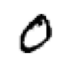

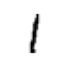

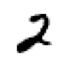

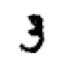

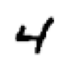

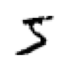

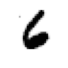

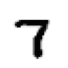

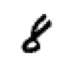

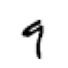

In [ ]:
[show_image(training_tensors[i][0]) for i in range(10)];

## Stacking the Tensors
For every pixel position, we want to compute the average over all the images of the intensity of that pixel. To do this we first combine all the images in this list into a single three-dimensional tensor. The most common way to describe such a tensor is to call it a rank-3 tensor. We often need to stack up individual tensors in a collection into a single tensor. Unsurprisingly, PyTorch comes with a function called `stack` that we can use for this purpose.

Some operations in PyTorch, such as taking a mean, require us to cast our integer types to float types. Since we'll be needing this later, we'll also cast our stacked tensor to float now. Casting in PyTorch is as simple as typing the name of the type you wish to cast to, and treating it as a method.

Generally when images are floats, the pixel values are expected to be between 0 and 1, so we will also divide by 255 here:

In [ ]:
stacked_numbers = {i: torch.stack(tensors).float() / 255 for i, tensors in training_tensors.items()} # Convert to float for later purposes, divide by 255 for formality
stacked_numbers[0].ndim, len(stacked_numbers[0].shape) # Number of axises is the rank of a tensor

(3, 3)

## Calculating the 'mean' images

> The way to understand the "axis" of an operation is that the operation collapses the specified axis. So when it collapses the axis 0, axis 0 becomes length 1.

In [ ]:
mean_numbers = {i: images.mean(0) for i, images in stacked_numbers.items()} # Get mean along axis 0 since those are the stacked images
stacked_numbers[0].shape, mean_numbers[0].shape

(torch.Size([5923, 28, 28]), torch.Size([28, 28]))

## Showing each of the 'mean' images

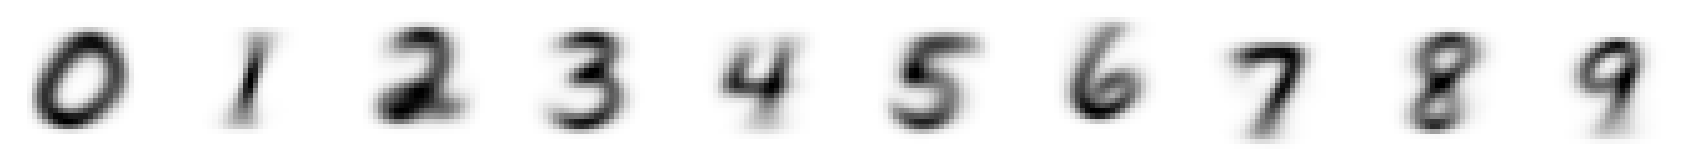

In [ ]:
show_images(list(mean_numbers.values()))

According to this dataset, these are the ideal numbers 0 - 9! You can see how it's very dark where all the images agree it should be dark, but it becomes wispy and blurry where the images disagree.

## Picking arbitrary datapoint

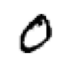

In [ ]:
ex_zero = stacked_numbers[0][0]
show_image(ex_zero);

## Getting distance from example image to mean image
How can we determine its distance from our ideal 3? We can't just add up the differences between the pixels of this image and the ideal digit. Some differences will be positive while others will be negative, and these differences will cancel out, resulting in a situation where an image that is too dark in some places and too light in others might be shown as having zero total differences from the ideal. That would be misleading!

To avoid this, we can take the mean of the *absolute value* of differences (absolute value is the function that replaces negative values with positive values). This is called the *mean absolute difference* or *L1 norm*

In [ ]:
for i, mean in mean_numbers.items():
  dist = (ex_zero - mean).abs().mean()
  print(f"{i}: {dist}")

0: 0.11076949536800385
1: 0.16433314979076385
2: 0.17881086468696594
3: 0.16792801022529602
4: 0.17648711800575256
5: 0.14877468347549438
6: 0.16509674489498138
7: 0.16900908946990967
8: 0.17084139585494995
9: 0.16944833099842072


You can see that the example image is 'closest' to the mean image of 0, which is great :)

Now onto checking how accurate this approach truly is

## Metric for overall Accuracy
In order to calculate a metric for overall accuracy, we will need to calculate the distance to the ideal label for every image in the validation set. How do we do that calculation? We could write a loop over all of the single-image tensors that are stacked within our validation set tensor, but instead we can take advantage of broadcasting.

In [ ]:
def diff(a, b): 
  return (a - b).abs().mean((-1, -2))

The `diff` function takes advantage of broadcasting, allowing tensors of different sizes to be compared. This is WAY more efficient when comparing all the tensors corresponding to a label to the general mean. 

Note that `diff` calls `mean((-1,-2))`. The tuple `(-1,-2)` represents a range of axes. In Python, `-1` refers to the last element, and `-2` refers to the second-to-last. So in this case, this tells PyTorch that we want to take the mean ranging over the values indexed by the last two axes of the tensor. The last two axes are the horizontal and vertical dimensions of an image. After taking the mean over the last two axes, we are left with just the first tensor axis, which indexes over our images, which is why our final size was `(1010)`. In other words, for every image, we averaged the intensity of all the pixels in that image.

## Calculating accuracy of this approach
We are now going to try the distance function on the test (validation) set, and see how accurate the pixel similarity approach is.

First, we are going to stack the tensors within the test set (also making sure to convert them into floats and divide by 255)

In [ ]:
test_stacked_numbers = {i: torch.stack(tensors).float() / 255 for i, tensors in testing_tensors.items()}

Now to get the accuracies for each different label, we will loop over every label, and then for each label and its stacked images, we will calculate the distance from its stacked images to every mean image. We can then calculate the minimum distance of those distances, and get how accurate it was overall.

In [ ]:
print(tensor([1, 2, 3]).shape)
accuracies = []
for i, stacked in test_stacked_numbers.items():
  errs = [diff(stacked, mean_numbers[num]) for num in range(10)]
  stacked_errs = torch.stack(errs)
  min = stacked_errs.min(0)
  acc = (tensor(i) == min.indices).float().mean()
  print("Label:", i, "had an accuracy of:", acc)
  accuracies.append(acc)
print("Overall accuracy:", tensor(accuracies).mean())  

torch.Size([3])
Label: 0 had an accuracy of: tensor(0.8153)
Label: 1 had an accuracy of: tensor(0.9982)
Label: 2 had an accuracy of: tensor(0.4234)
Label: 3 had an accuracy of: tensor(0.6089)
Label: 4 had an accuracy of: tensor(0.6680)
Label: 5 had an accuracy of: tensor(0.3262)
Label: 6 had an accuracy of: tensor(0.7871)
Label: 7 had an accuracy of: tensor(0.7646)
Label: 8 had an accuracy of: tensor(0.4425)
Label: 9 had an accuracy of: tensor(0.7760)
Overall accuracy: tensor(0.6610)


# Modeling using Stochastic Gradient Descent (SGD)
## Getting the training set
We first combine all of the images and resize each of the images to be a vector instead of a matrix. And then for each of the labels, we create a 1x10 tensor representing the correct label. 

In [ ]:
train_x = torch.cat([stacked_numbers[i] for i in range(10)]).view(-1, 28*28)
train_y = tensor([[1 if i == num else 0 for i in range(10)] for num, images in training_tensors.items() for _ in range(len(images))])
train_x.shape, train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 10]))

## Creating datasets
A `Dataset` in PyTorch is required to return a tuple of (x,y) when indexed. Python provides a zip function which, when combined with list, provides a simple way to get this functionality:

In [ ]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

## Creating datasets for the tests
We do the same thing as before except now for the training sets.

In [ ]:
test_x = torch.cat([test_stacked_numbers[i] for i in range(10)]).view(-1, 28*28)
test_y = tensor([[1 if i == num else 0 for i in range(10)] for num, images in testing_tensors.items() for _ in range(len(images))])
print(test_x.shape, test_y.shape)
test_dset = list(zip(test_x, test_y))
x, y = test_dset[0]
x.shape, y

torch.Size([10000, 784]) torch.Size([10000, 10])


(torch.Size([784]), tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

# Creating / Training a Linear Model

## Defining the initial weights function
Instantiates matrices full of random values of the given size

In [ ]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28,10))
bias = init_params(10)

## Creating linear perceptron model

In [ ]:
def linear_model(xbatch): 
  return xbatch @ weights + bias
preds = linear_model(train_x)
preds, preds.shape

(tensor([[  2.9148,   2.0788,  -3.7751,  ...,  -9.6422,  -3.5034,  -2.1119],
         [  4.7848,  -5.7576,  -9.4797,  ...,  -4.7872,  -9.0003,  -7.4292],
         [ 13.6202,  -1.7590,   0.0569,  ..., -13.3066, -11.7494, -11.7438],
         ...,
         [  2.4666, -11.6480,  -0.8789,  ...,  -9.9539,   1.2532, -14.9289],
         [  8.6999,   4.4458,  10.2046,  ...,  -2.0210,  -0.3945, -11.4134],
         [ 10.5432,  -5.3799,  -5.4897,  ...,   1.3866,   4.3778, -11.3147]], grad_fn=<AddBackward0>),
 torch.Size([60000, 10]))

We need gradients in order to improve our model using SGD, and in order to calculate gradients we need some loss function that represents how good our model is. That is because the gradients are a measure of how that loss function changes with small tweaks to the weights.

Instead of using the previous loss function, since there are multiple possible labels, we are going to use the cross entropy loss function, which measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label.

In [ ]:
def cross_entropy_loss(xbatch, ybatch):
    probs = xbatch.softmax(dim=1)
    loss = -(ybatch * probs.log()).sum() / len(probs)
    return loss

## Creating dataloaders

Now that we have a loss function that is suitable for driving SGD, we can consider some of the details involved in the next phase of the learning process, which is to change or update the weights based on the gradients. This is called an *optimization step*.

In order to take an optimization step we need to calculate the loss over one or more data items. How many should we use? We could calculate it for the whole dataset, and take the average, or we could calculate it for a single data item. But neither of these is ideal. Calculating it for the whole dataset would take a very long time. Calculating it for a single item would not use much information, so it would result in a very imprecise and unstable gradient. That is, you'd be going to the trouble of updating the weights, but taking into account only how that would improve the model's performance on that single item.

So instead we take a compromise between the two: we calculate the average loss for a few data items at a time. This is called a *mini-batch*. The number of data items in the mini-batch is called the *batch size*. A larger batch size means that you will get a more accurate and stable estimate of your dataset's gradients from the loss function, but it will take longer, and you will process fewer mini-batches per epoch. 

We get better generalization if we can vary things during training. One simple and effective thing we can vary is what data items we put in each mini-batch. Rather than simply enumerating our dataset in order for every epoch, instead what we normally do is randomly shuffle it on every epoch, before we create mini-batches. PyTorch and fastai provide a class that will do the shuffling and mini-batch collation for you, called `DataLoader`.

A `DataLoader` can take any Python collection and turn it into an iterator over mini-batches, like so:

When we pass a `Dataset` to a `DataLoader` we will get back mini-batches which are themselves tuples of tensors representing batches of independent and dependent variables:

In [ ]:
dl = DataLoader(dset, batch_size = 64)
test_dl = DataLoader(test_dset, batch_size = 64)
a_batch = first(dl)
a_batch[0].shape, a_batch[1].shape

(torch.Size([64, 784]), torch.Size([64, 10]))

Getting the loss of the sample batch versus the actual labels

In [ ]:
images, labels = a_batch
preds = linear_model(images)
loss = cross_entropy_loss(preds, labels)
loss

tensor(11.0960, grad_fn=<DivBackward0>)

Back propagate the loss to update the weights and bias, making sure to reset the gradients to zero with `.grad.zero_()` since `loss.backward` actually adds the gradients of loss to any gradients that are currently stored.

In [ ]:
loss.backward()
lr = 1e-3
weights.data -= weights.grad * lr
bias.data -= bias.grad * lr
weights.grad.zero_()
bias.grad.zero_();
preds = linear_model(images)
loss = cross_entropy_loss(preds, labels)
loss

tensor(10.9900, grad_fn=<DivBackward0>)

Calculating / updating gradients

In [ ]:
def calc_grad(xbatch, ybatch, model):
    preds = model(xbatch)
    loss = cross_entropy_loss(preds, ybatch)
    loss.backward()

Calculating the accuracy for a batch, by taking the predictions, seeing which prediction was highest, and assuming that was the classification from the model. Then it compares the highest prediction, to the actual label (which will be the greatest value in the tensor) and checking the accuracy.

In [ ]:
def batch_accuracy(xpreds, ybatch):
    return (xpreds.max(1).indices == ybatch.max(1).indices).float().mean()

Creating a function that measures the overall accuracy by going through each batch in the validation dataloader and getting that batches' accuracy.

In [ ]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xbatch), ybatch) for xbatch, ybatch in test_dl]
  return round(torch.stack(accs).mean().item(), 4)
validate_epoch(linear_model)

0.0699

Check to see if the accuracy increases after training for one epoch

In [ ]:
def train_epoch(model, lr, params):
    for xbatch, ybatch in dl:
        calc_grad(xbatch, ybatch, model)
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()          

In [ ]:
lr = 1e-3
params = weights, bias
train_epoch(linear_model, lr, params)
validate_epoch(linear_model)

0.0973

You can see that the accuracy increased, so let's continue training the model

In [ ]:
for i in range(40):
    train_epoch(linear_model, lr, params)
    print(validate_epoch(linear_model), end=' ')

0.1241 0.1503 0.1794 0.2129 0.2501 0.2886 0.3245 0.3564 0.3891 0.4189 0.4426 0.4668 0.483 0.5005 0.5175 0.532 0.5454 0.5574 0.5703 0.5824 0.5941 0.6038 0.6131 0.6201 0.6278 0.6367 0.6435 0.6488 0.6541 0.6607 0.6654 0.6697 0.6747 0.6792 0.6838 0.6882 0.6912 0.6955 0.7001 0.7027 

# Creating an Optimizer

Our next step will be to create an object that will handle the SGD step for us. In PyTorch, it's called an *optimizer*. First, we are going to replace our model with PyTorch's `nn.Linear` module, which does the same thing as our `init_params` and `linear_model` together

In [ ]:
linear_model = nn.Linear(28 * 28, 10)

Every PyTorch module knows what parameters it has that can be trained; they are available through the `parameters` method:

In [ ]:
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([10, 784]), torch.Size([10]))

We can then use the `SGD` class provided by fastai

In [ ]:
opt = SGD(linear_model.parameters(), lr)

And simplify our previous functions to be:

In [ ]:
def train_epoch(model):
    for xbatch, ybatch in dl:
        calc_grad(xbatch, ybatch, model)
        opt.step()
        opt.zero_grad()

In [ ]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [ ]:
train_model(linear_model, 20)

0.1381 0.368 0.5212 0.6048 0.6658 0.708 0.7376 0.7598 0.7765 0.7905 0.801 0.8105 0.8183 0.8265 0.8314 0.837 0.8413 0.8453 0.8495 0.852 

We can also use fastai's `Learner.fit` which takes in a `DataLoaders` object

In [ ]:
dls = DataLoaders(dl, test_dl)

To create a `Learner` we need to pass in all the elements that we've created in this chapter: the `DataLoaders`, the model, the optimization function (which will be passed the parameters), the loss function, and optionally any metrics to print:

In [ ]:
linear_model = nn.Linear(28 * 28, 10)
learn = Learner(dls, linear_model, opt_func = SGD,
                loss_func = cross_entropy_loss, metrics = batch_accuracy)

In [ ]:
learn.fit(20, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,1.451393,1.984994,0.131000,00:02
1,1.080089,1.599484,0.382700,00:02
2,0.944222,1.323168,0.524600,00:02
3,0.859160,1.142235,0.611300,00:02
4,0.799193,1.016727,0.671400,00:02
5,0.754325,0.924877,0.708500,00:02
6,0.719321,0.854779,0.737300,00:02
7,0.691129,0.799497,0.759200,00:02
8,0.667852,0.754745,0.775100,00:02
9,0.648246,0.717744,0.790400,00:03


# Adding Non-Linearity

So far we have a general procedure for optimizing the parameters of a function, and we have tried it out on a very boring function: a simple linear classifier. A linear classifier is very constrained in terms of what it can do. To make it a bit more complex (and able to handle more tasks), we need to add something nonlinear between two linear classifiers—this is what gives us a neural network.

In [ ]:
simple_net = nn.Sequential(
    nn.Linear(28*28,120),
    nn.ReLU(),
    nn.Linear(120,10)
)

`nn.Sequential` creates a module that will call each of the listed layers or functions in turn.

`nn.ReLU` is a PyTorch module that refers to the *rectified linear unit*  function (just replacing negative numbers with 0), and is the *non-linearity* or *activation function* that allows for multiple distinct layers.

The basic idea is that by using more linear layers, we can have our model do more computation, and therefore model more complex functions. But there's no point just putting one linear layer directly after another one, because when we multiply things together and then add them up multiple times, that could be replaced by multiplying different things together and adding them up just once! That is to say, a series of any number of linear layers in a row can be replaced with a single linear layer with a different set of parameters.

But if we put a nonlinear function between them, such as `max`, then this is no longer true. Now each linear layer is actually somewhat decoupled from the other ones, and can do its own useful work.

Now we can recreate the `Learner` object with the new neural network.

In [ ]:
learn = Learner(dls, simple_net, opt_func = SGD,
                loss_func = cross_entropy_loss, metrics = batch_accuracy)
learn.fit(40, lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,2.143113,2.146945,0.191500,00:07
1,1.675615,2.010267,0.170800,00:05
2,1.246457,1.871180,0.198200,00:03
3,0.955639,1.706980,0.299600,00:03
4,0.780574,1.545822,0.376800,00:03
5,0.671338,1.409739,0.423900,00:03
6,0.598535,1.299825,0.458200,00:03
7,0.547054,1.210941,0.491300,00:03
8,0.508819,1.137637,0.520000,00:03
9,0.479227,1.076136,0.547700,00:03


View accuracy as a graph

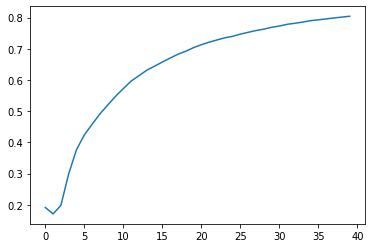

In [ ]:
plt.plot(L(learn.recorder.values).itemgot(2));

Viewing final accuracy

In [ ]:
learn.recorder.values[-1][2]

0.8044000267982483

# Using resnet18

Resnet is an 18-layer model which we can use to see how fast our model can accurately model the validation set.

In [ ]:
dls = ImageDataLoaders.from_folder(path, train='training', valid='testing')



In [ ]:
learn = vision_learner(dls, resnet18, pretrained=False, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.100438,0.045707,0.987100,14:51


After one epoch of training, it already achieves 98.7% accuracy O_O

We can now plot the confusion matrix to see where it stumbled

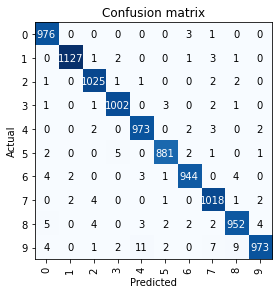

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

And we can also plot the top losses to see which images it messed up on (and perhaps change the label of in the actual dataset if we deem the label to be wrong)

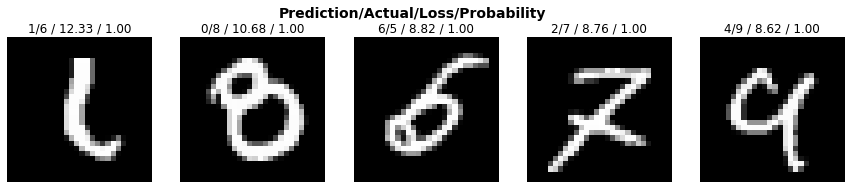

In [ ]:
interp.plot_top_losses(5, nrows=1)

You can see that the "6", "5", and "9" are examples of scuffed images